#Image Classification Using Model Convolutional Neural Network
##Using Tensorflow Keras
###By Tugus Avanindra
This Image Classification model is trained using rockpaperscissors dataset provided by Julien de la Bruère-Terreault. The dataset contains 2188 pictures of rock, paper, and scissors gesture

First, we need to import tensorflow

In [2]:
import tensorflow as tf

Download the dataset using wget

In [4]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-07-05 01:33:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  18.6MB/s    in 20s     

2021-07-05 01:33:36 (15.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract the dataset

In [5]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In order to split data to training and testing purposes, we need split_folders module. More info on https://pypi.org/project/split-folders/

In [6]:
!pip install split_folders

In [7]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images' #base directory
data_dir = '/tmp/rockpaperscissors/rps-cv-images/data_dir' # directory for splitting data 

splitfolders.ratio(base_dir, output = data_dir, seed=42, ratio=(0.6,0.4)) #splitting so there are 40% validation data available

Copying files: 2188 files [00:00, 3049.15 files/s]


in order to visualize the directory tree, we can use tree (a linux module)

In [24]:
# visualizing the directory tree
!apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [9]:
!tree -d /tmp

/tmp
├── initgoogle_syslog_dir.0
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
└── rockpaperscissors
    ├── paper
    ├── rock
    ├── rps-cv-images
    │   ├── data_dir
    │   │   ├── train
    │   │   │   ├── paper
    │   │   │   ├── rock
    │   │   │   └── scissors
    │   │   └── val
    │   │       ├── paper
    │   │       ├── rock
    │   │       └── scissors
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── scissors

27 directories


Now we know the directory for training the model is rps-cv-images

In [10]:
# assigning directory to variables

rock = '/tmp/rockpaperscissors/rps-cv-images/rock'
rock_train = '/tmp/rockpaperscissors/rps-cv-images/data_dir/train/rock'
rock_val = '/tmp/rockpaperscissors/rps-cv-images/data_dir/val/rock'

paper = '/tmp/rockpaperscissors/rps-cv-images/paper'
paper_train = '/tmp/rockpaperscissors/rps-cv-images/data_dir/train/paper'
paper_val = '/tmp/rockpaperscissors/rps-cv-images/data_dir/val/paper'

scissors = '/tmp/rockpaperscissors/rps-cv-images/scissors'
scissors_train = '/tmp/rockpaperscissors/rps-cv-images/data_dir/train/scissors'
scissors_val = '/tmp/rockpaperscissors/rps-cv-images/data_dir/val/scissors'

# mencari tahu jumlah gambar untuk validasi
sumval = len(os.listdir(rock_val)) + len(os.listdir(paper_val)) + len(os.listdir(scissors_val))
sumall = len(os.listdir(rock)) + len(os.listdir(paper)) + len(os.listdir(scissors))
sumtrain = len(os.listdir(rock_train)) + len(os.listdir(paper_train)) + len(os.listdir(scissors_train))
print('jumlah gambar total:', sumall)
print('jumlah gambar train:', sumtrain)
print("jumlah gambar untuk validasi:", sum)


jumlah gambar total: 2188
jumlah gambar train: 1312
jumlah gambar untuk validasi: <built-in function sum>


In [11]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images/' # setting new base_dir
train_dir = os.path.join(base_dir, 'data_dir/train')
val_dir = os.path.join(base_dir, 'data_dir/val')

In [12]:
# importing ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# creating generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')

In [14]:
# Creating image generator using flow_from_directory method
train_generator = train_datagen.flow_from_directory(train_dir, # training data directory,
                                                    target_size=(150,150), #picture resolution target is 150x150px
                                                    batch_size= 32,
                                                    class_mode='categorical' #because there are 3 class (rock, paper, and scissors), we use categorical
)


validation_generator = test_datagen.flow_from_directory(val_dir, #validation directory
                                                        target_size=(150,150),
                                                        batch_size = 32,
                                                        class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [25]:
# now actually creating the model using keras sequential model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #input layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')#softmax because there are more than 2 output class (rock paper scissors)
])

In [16]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(lr=0.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [18]:
#Train the model with the data

model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/20
25/25 - 44s - loss: 1.0603 - accuracy: 0.4700 - val_loss: 0.9135 - val_accuracy: 0.7437
Epoch 2/20
25/25 - 42s - loss: 0.8353 - accuracy: 0.6662 - val_loss: 0.7430 - val_accuracy: 0.6938
Epoch 3/20
25/25 - 42s - loss: 0.6163 - accuracy: 0.7862 - val_loss: 0.6535 - val_accuracy: 0.7750
Epoch 4/20
25/25 - 42s - loss: 0.5386 - accuracy: 0.8100 - val_loss: 0.5001 - val_accuracy: 0.8313
Epoch 5/20
25/25 - 42s - loss: 0.4098 - accuracy: 0.8650 - val_loss: 0.5992 - val_accuracy: 0.7875
Epoch 6/20
25/25 - 42s - loss: 0.3522 - accuracy: 0.8825 - val_loss: 0.2520 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 42s - loss: 0.3278 - accuracy: 0.8963 - val_loss: 0.4390 - val_accuracy: 0.8188
Epoch 8/20
25/25 - 43s - loss: 0.2857 - accuracy: 0.9013 - val_loss: 0.3111 - val_accuracy: 0.8813
Epoch 9/20
25/25 - 43s - loss: 0.2649 - accuracy: 0.9162 - val_loss: 0.1675 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 42s - loss: 0.2306 - accuracy: 0.9150 - val_loss: 0.2298 - val_accuracy: 0.9250
Epoch 11/

Saving rock.jpg to rock.jpg
rock.jpg
[[0. 1. 0.]]
Rock


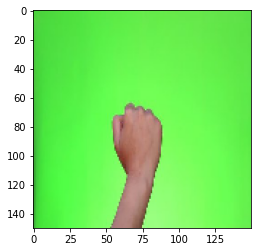

In [20]:
# Code to select pictures interactively
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes[0][0] > 0:
    print('Paper')
  elif classes[0][1] > 0 :
    print('Rock')
  else:
    print('Scissors')

In [22]:
#saving the model
model.save('rockpaperscissors_model')

INFO:tensorflow:Assets written to: rockpaperscissors_model/assets
